<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [84]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

// needed to generate the Table of contents 
// taken from github.com/kmahelona/ipython_notebook_goodies

<IPython.core.display.Javascript object>

# Modeling
Importing modules and data from prevoius step


In [85]:
## Fit Models with Training Data Set
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fast')

import seaborn as sns

In [142]:
from timeit import default_timer as timer
from datetime import datetime, date
from tqdm.auto import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

import pickle


In [87]:
#Load data and scaler model

X_train_scaled = pd.read_csv("../data/X_train_scaled.csv").to_numpy()
y_train = pd.read_csv("../data/y_train.csv").to_numpy().ravel()
X_train_over_scaled = pd.read_csv("../data/X_train_over_scaled.csv").to_numpy()
y_train_over = pd.read_csv("../data/y_train_over.csv").to_numpy().ravel()
X_test_scaled = pd.read_csv("../data/X_test_scaled.csv").to_numpy()
y_test = pd.read_csv("../data/y_test.csv").to_numpy().ravel()
feature_list = pd.read_csv("../data/feature_list.csv")
feature_list = pd.Index(list(feature_list["0"]))

scaler = joblib.load("../data/scaler.pkl")

In [88]:
train_df = pd.DataFrame(X_train_scaled, columns = feature_list)
train_df.head()

,cycle_time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,0.00000,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662
1,0.00277,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014
2,0.00554,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375
3,0.00831,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386
4,0.01108,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502


In [89]:
train_over_df = pd.DataFrame(X_train_over_scaled, columns = feature_list)
train_over_df.head()

,cycle_time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,0.576177,0.933735,0.596032,0.808913,0.294686,0.666667,0.019923,0.821429,0.249467,0.558824,0.025183,0.874952,0.750000,0.232558,0.255316
1,0.531856,0.647590,0.526924,0.633187,0.439614,0.378788,0.422911,0.517857,0.520256,0.235294,0.463980,0.529434,0.583333,0.465116,0.352665
2,0.792244,0.524096,0.629387,0.910702,0.322061,0.560606,0.126447,0.785714,0.219616,0.661765,0.093044,0.825702,0.583333,0.387597,0.320077
3,0.448753,0.704819,0.373011,0.614619,0.520129,0.363636,0.314502,0.511905,0.494670,0.338235,0.322531,0.443247,0.583333,0.403101,0.488401
4,0.554017,0.665663,0.751908,0.854828,0.285024,0.303030,0.521583,0.678571,0.336887,0.411765,0.568170,0.642940,0.750000,0.240310,0.159348


In [90]:
test_df = pd.DataFrame(X_test_scaled, columns = feature_list)
test_df.head()

,cycle_time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,0.00000,0.545181,0.310661,0.269413,0.652174,0.212121,0.127614,0.208333,0.646055,0.220588,0.132160,0.308965,0.333333,0.558140,0.661834
1,0.00277,0.150602,0.379551,0.222316,0.805153,0.166667,0.146684,0.386905,0.739872,0.264706,0.204768,0.213159,0.416667,0.682171,0.686827
2,0.00554,0.376506,0.346632,0.322248,0.685990,0.227273,0.158081,0.386905,0.699360,0.220588,0.155640,0.458638,0.416667,0.728682,0.721348
3,0.00831,0.370482,0.285154,0.408001,0.679549,0.196970,0.105717,0.255952,0.573561,0.250000,0.170090,0.257022,0.250000,0.666667,0.662110
4,0.01108,0.391566,0.352082,0.332039,0.694042,0.166667,0.102396,0.273810,0.737740,0.220588,0.152751,0.300885,0.166667,0.658915,0.716377


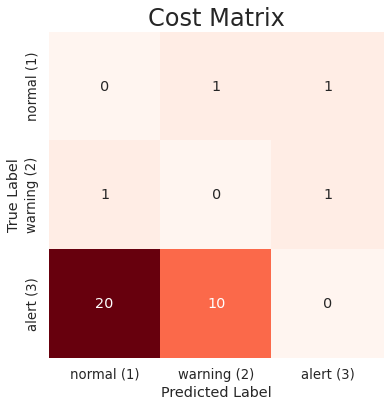

In [91]:
cost_matrix = [[0,1,1],[1,0,1],[20,10,0]]
categories = ['normal (1)','warning (2)','alert (3)']

fig = plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)
ax = sns.heatmap(cost_matrix, annot=cost_matrix, fmt='', cmap='Reds', cbar=False, xticklabels=categories)
ax.set_yticklabels(categories, rotation=90, va="center")
sns.set(font_scale=1.4)
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
sns.set(font_scale=2)
ax.set_title('Cost Matrix')
plt.savefig("../figures/Cost_Matrix.png") 

## Fit Models with Training Data Set

Let's build some useful functions

In [92]:
def my_cost_function(y_test, y_pred):
    cost_matrix = [[0,1,1],[1,0,1],[20,10,0]]
    conf_matrix = confusion_matrix(y_test, y_pred)
    loss = -np.sum(conf_matrix*cost_matrix)
    return loss

my_score = make_scorer(my_cost_function, greater_is_better=False)

In [93]:
def try_model(model, X_train, y_train, X_test, y_test):
    """ Fits a model on the selected data with the default parameters 
    ex. usage 
        summary = try_model(KNeighborsClassifier(),X_train, y_train)"""
    # statements
    print('Trying Model :'+ str(model))
    start = timer()
    model.fit(X_train, y_train)
    middle = timer()
    test_score = model.score(X_test, y_test)
    #cv_score = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')
    end = timer()
    train_score = model.score(X_train, y_train) 
    
    
    #my_test_score = cross_val_score(model, X_test, y_test, cv=5, scoring=my_score)
    #print("|  Mean Cost: %0.2f (+/- %0.2f)" % (my_test_score.mean(), my_test_score.std() * 2))
    
    # calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cost = my_cost_function(y_test, y_pred)
    
    print('|  Train Score: ' + str(round(train_score,3)))
    print('|  Test Score: ' + str(round(test_score,3)))
    
    train_elapsed = round(middle - start,3)
    test_elapsed = round(end - middle,3)

    summary = {'model_name': str(model),
               'training time [s]': train_elapsed,
               'test time [s]': test_elapsed,
               'test accuracy': test_score,
               'cost':cost,
               'train accuracy': train_score,
              'confusion matrix': cm,
              'trained_model':model}
    #print(summary)
    
    return summary

In [94]:
def plot_multiclass_confusion_matrix(y_test, y_pred, categories):
    """Plots the confusion matrix given the data and the lables."""
    
    cm = confusion_matrix(y_test, y_pred)
    #print(cm)
    
    group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    stats_text = "\n\nAccuracy={:0.2f}%".format(100*np.trace(cm) / float(np.sum(cm)))
    
    box_labels = [f"{v2}{v3}".strip() for v2, v3 in zip(group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    fig = plt.figure(figsize=(6,6))
    sns.set(font_scale=1.4)
    ax = sns.heatmap(cm, annot=box_labels, fmt='', cmap='Reds', xticklabels=categories, yticklabels=categories)
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    ax.set_title(stats_text)
    
    return fig, ax
 

In [95]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores")
    ax.set_xlabel(name_param_1)
    ax.set_ylabel('CV Average Score')
    ax.legend(loc="best")
    ax.grid('on')



In [96]:
models_summary = pd.DataFrame()
models_summary_over = pd.DataFrame()



### Dummy Classifier


In [97]:
strategies = ['most_frequent', 'stratified', 'prior', 'uniform']

for s in tqdm(strategies) :
    res = try_model(DummyClassifier(strategy=s), X_train_scaled, y_train, X_test_scaled, y_test)
    models_summary = models_summary.append(res, ignore_index=True)
    res_over = try_model(DummyClassifier(strategy=s), X_train_over_scaled, y_train_over, X_test_scaled, y_test)
    models_summary_over = models_summary_over.append(res_over, ignore_index=True)


Trying Model :DummyClassifier(strategy='most_frequent')
|  Train Score: 0.515
|  Test Score: 0.761
Trying Model :DummyClassifier(strategy='most_frequent')
|  Train Score: 0.333
|  Test Score: 0.065
Trying Model :DummyClassifier(strategy='stratified')
|  Train Score: 0.384
|  Test Score: 0.45
Trying Model :DummyClassifier(strategy='stratified')
|  Train Score: 0.329
|  Test Score: 0.341
Trying Model :DummyClassifier(strategy='prior')
|  Train Score: 0.515
|  Test Score: 0.761
Trying Model :DummyClassifier(strategy='prior')
|  Train Score: 0.333
|  Test Score: 0.065
Trying Model :DummyClassifier(strategy='uniform')
|  Train Score: 0.33
|  Test Score: 0.335
Trying Model :DummyClassifier(strategy='uniform')
|  Train Score: 0.335
|  Test Score: 0.339



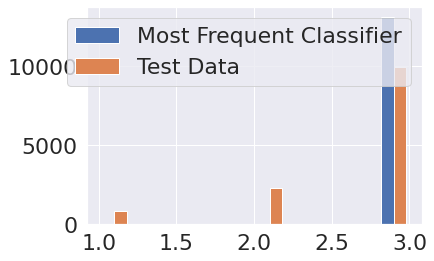

In [98]:
clf_dummy = DummyClassifier(strategy='most_frequent').fit(X_train_scaled, y_train)
y_dummy = clf_dummy.predict(X_test_scaled)
plt.hist([y_dummy, y_test])
plt.legend(['Most Frequent Classifier', 'Test Data'])

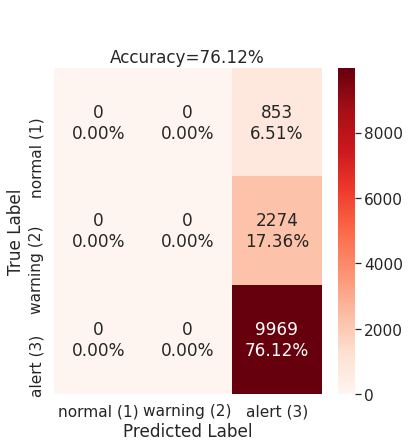

In [99]:
_ = plot_multiclass_confusion_matrix(y_test, clf_dummy.predict(X_test_scaled),['normal (1)','warning (2)','alert (3)'])


In [100]:
models_summary

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
0,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",-3127.0,DummyClassifier(strategy='most_frequent'),0.761225,0.001,0.515293,DummyClassifier(strategy='most_frequent'),0.002
1,"[[192, 217, 444], [548, 561, 1165], [2373, 248...",-74684.0,DummyClassifier(strategy='stratified'),0.449985,0.004,0.383549,DummyClassifier(strategy='stratified'),0.002
2,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",-3127.0,DummyClassifier(strategy='prior'),0.761225,0.001,0.515293,DummyClassifier(strategy='prior'),0.001
3,"[[263, 302, 288], [797, 743, 734], [3352, 3223...",-101391.0,DummyClassifier(strategy='uniform'),0.334835,0.001,0.329795,DummyClassifier(strategy='uniform'),0.001


In [101]:
models_summary_over

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
0,"[[853, 0, 0], [2274, 0, 0], [9969, 0, 0]]",-201654.0,DummyClassifier(strategy='most_frequent'),0.065134,0.001,0.333333,DummyClassifier(strategy='most_frequent'),0.002
1,"[[290, 292, 271], [800, 720, 754], [3307, 3273...",-100987.0,DummyClassifier(strategy='stratified'),0.340715,0.003,0.328787,DummyClassifier(strategy='stratified'),0.001
2,"[[853, 0, 0], [2274, 0, 0], [9969, 0, 0]]",-201654.0,DummyClassifier(strategy='prior'),0.065134,0.001,0.333333,DummyClassifier(strategy='prior'),0.001
3,"[[276, 300, 277], [760, 733, 781], [3333, 3322...",-101998.0,DummyClassifier(strategy='uniform'),0.339493,0.001,0.334964,DummyClassifier(strategy='uniform'),0.001


--> The Dummy Classifier: Most Frequent has 0.761 Accuracy!

In [102]:
models_summary_over['trained_model'][0].predict(X_test_scaled)

array([1, 1, 1, ..., 1, 1, 1])

### Test stock models (Default Parameters)
- KNeighborsClassifier
- SVC - Linear and RBF
- DecisionTreeClassifier
- RandomForestClassifier
- AdaBoostClassifier
- GradientBoostingClassifier




In [103]:
models_to_try = [KNeighborsClassifier(),
                 KNeighborsClassifier(n_neighbors=3),
                 DecisionTreeClassifier(),
                 DecisionTreeClassifier(criterion='gini',max_depth=3),
                 RandomForestClassifier(),
                 RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
                 SVC(),
                 SVC(kernel="linear", C=0.025),
                 AdaBoostClassifier(),
                 GradientBoostingClassifier()
                ]
short_names = ['most_frequent', 'stratified', 'prior', 'uniform'] + ['KNN()',
                 'KNN(3)',
                 'Tree()',
                 'Tree(gini,d=3)',
                 'RandomForest()',
                 'RF(d=5, n=10, f=1)',
                 'SVC()',
                 'SVC("linear", C=0.025)',
                 'Ada()',
                 'Gradient()'
                ]

In [124]:
# Commented for speed of execution - results are saved in pickles
# for m in tqdm(models_to_try) :
#     res = try_model(m, X_train_scaled, y_train, X_test_scaled, y_test)
#     models_summary = models_summary.append(res, ignore_index=True)
#     res_over = try_model(m, X_train_over_scaled, y_train_over, X_test_scaled, y_test)
#     models_summary_over = models_summary_over.append(res_over, ignore_index=True)

In [123]:
# pkl_filename = "../data/pickle_models_summary_"+str(date.today())+".pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(models_summary, file)
    
# pkl_filename = "../data/pickle_models_summary_over_"+str(date.today())+".pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(models_summary_over, file)

```
Trying Model :KNeighborsClassifier()
|  Train Score: 0.848
|  Test Score: 0.802
Trying Model :KNeighborsClassifier()
|  Train Score: 0.896
|  Test Score: 0.746
Trying Model :KNeighborsClassifier(n_neighbors=3)
|  Train Score: 0.875
|  Test Score: 0.79
Trying Model :KNeighborsClassifier(n_neighbors=3)
|  Train Score: 0.937
|  Test Score: 0.746
Trying Model :DecisionTreeClassifier()
|  Train Score: 1.0
|  Test Score: 0.764
Trying Model :DecisionTreeClassifier()
|  Train Score: 1.0
|  Test Score: 0.771
Trying Model :DecisionTreeClassifier(max_depth=3)
|  Train Score: 0.758
|  Test Score: 0.776
Trying Model :DecisionTreeClassifier(max_depth=3)
|  Train Score: 0.745
|  Test Score: 0.769
Trying Model :RandomForestClassifier()
|  Train Score: 1.0
|  Test Score: 0.833
Trying Model :RandomForestClassifier()
|  Train Score: 1.0
|  Test Score: 0.828
Trying Model :RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)
|  Train Score: 0.774
|  Test Score: 0.824
Trying Model :RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)
|  Train Score: 0.767
|  Test Score: 0.785
Trying Model :SVC()
|  Train Score: 0.81
|  Test Score: 0.839
Trying Model :SVC()
|  Train Score: 0.803
|  Test Score: 0.793
Trying Model :SVC(C=0.025, kernel='linear')
|  Train Score: 0.782
|  Test Score: 0.826
Trying Model :SVC(C=0.025, kernel='linear')
|  Train Score: 0.774
|  Test Score: 0.801
Trying Model :AdaBoostClassifier()
|  Train Score: 0.782
|  Test Score: 0.834
Trying Model :AdaBoostClassifier()
|  Train Score: 0.764
|  Test Score: 0.812
Trying Model :GradientBoostingClassifier()
|  Train Score: 0.831
|  Test Score: 0.836
Trying Model :GradientBoostingClassifier()
|  Train Score: 0.829
|  Test Score: 0.805
```

In [125]:
pkl_filename = "../data/pickle_models_summary_2020-10-12.pkl"
with open(pkl_filename, 'rb') as file:
    models_summary = pickle.load(file)
    

pkl_filename = "../data/pickle_models_summary_over_2020-10-12.pkl"    
with open(pkl_filename, 'rb') as file:
    models_summary_over = pickle.load(file)

In [126]:
models_summary.sort_values(by=['test accuracy'], ascending=False).head()

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
10,"[[520, 294, 39], [88, 1224, 962], [10, 716, 92...",-8743.0,SVC(),0.838958,6.257,0.810043,SVC(),11.344
13,"[[576, 253, 24], [127, 1311, 836], [19, 886, 9...",-10480.0,GradientBoostingClassifier(),0.836210,0.045,0.831419,([DecisionTreeRegressor(criterion='friedman_ms...,20.652
12,"[[585, 227, 41], [210, 1050, 1014], [85, 598, ...",-9172.0,AdaBoostClassifier(),0.833919,0.166,0.782027,"(DecisionTreeClassifier(max_depth=1, random_st...",1.595
8,"[[545, 279, 29], [104, 1290, 880], [20, 869, 9...",-10382.0,RandomForestClassifier(),0.833461,0.234,1.000000,"(DecisionTreeClassifier(max_features='auto', r...",4.132
11,"[[519, 275, 59], [110, 947, 1217], [27, 589, 9...",-8091.0,"SVC(C=0.025, kernel='linear')",0.826130,2.606,0.781785,"SVC(C=0.025, kernel='linear')",7.643


In [128]:
models_summary_over.sort_values(by=['test accuracy'], ascending=False).head()

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
8,"[[546, 286, 21], [121, 1380, 773], [18, 1040, ...",-11961.0,RandomForestClassifier(),0.827505,0.246,1.000000,"(DecisionTreeClassifier(max_features='auto', r...",5.747
12,"[[596, 242, 15], [220, 1409, 645], [70, 1271, ...",-15232.0,AdaBoostClassifier(),0.811927,0.142,0.763835,"(DecisionTreeClassifier(max_depth=1, random_st...",2.124
13,"[[580, 268, 5], [140, 1690, 444], [23, 1676, 8...",-18077.0,GradientBoostingClassifier(),0.804826,0.052,0.828771,([DecisionTreeRegressor(criterion='friedman_ms...,29.420
11,"[[530, 307, 16], [119, 1618, 537], [26, 1599, ...",-17489.0,"SVC(C=0.025, kernel='linear')",0.801161,5.213,0.774245,"SVC(C=0.025, kernel='linear')",18.405
10,"[[527, 322, 4], [85, 1804, 385], [9, 1910, 8050]]",-20076.0,SVC(),0.792685,9.725,0.803154,SVC(),28.380


In [129]:
models_summary.sort_values(by=['cost'], ascending=False).head()

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
0,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",-3127.0,DummyClassifier(strategy='most_frequent'),0.761225,0.001,0.515293,DummyClassifier(strategy='most_frequent'),0.002
2,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",-3127.0,DummyClassifier(strategy='prior'),0.761225,0.001,0.515293,DummyClassifier(strategy='prior'),0.001
9,"[[540, 194, 119], [140, 471, 1663], [29, 158, ...",-4276.0,"RandomForestClassifier(max_depth=5, max_featur...",0.824145,0.012,0.774272,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.099
11,"[[519, 275, 59], [110, 947, 1217], [27, 589, 9...",-8091.0,"SVC(C=0.025, kernel='linear')",0.826130,2.606,0.781785,"SVC(C=0.025, kernel='linear')",7.643
10,"[[520, 294, 39], [88, 1224, 962], [10, 716, 92...",-8743.0,SVC(),0.838958,6.257,0.810043,SVC(),11.344


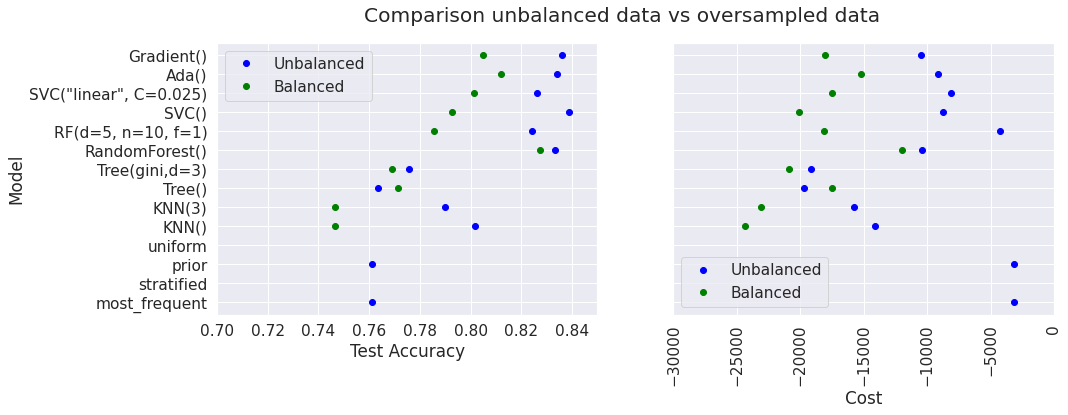

In [130]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.suptitle('Comparison unbalanced data vs oversampled data')

_ = ax[0].plot(models_summary['test accuracy'],models_summary['model_name'],'o',linestyle='None',color='blue')
_ = ax[0].plot(models_summary_over['test accuracy'],models_summary_over['model_name'],'o',linestyle='None',color='green')
_ = ax[0].legend(['Unbalanced', 'Balanced'])
labels = short_names
_ = ax[0].set_yticklabels(labels, rotation=0)
_ = ax[0].set_xlim([0.7,0.85])
#_ = ax[0].set_title('Test Accuracy')
_ = ax[0].set_xlabel('Test Accuracy')
_ = ax[0].set_ylabel('Model')

_ = ax[1].plot(models_summary['cost'],models_summary['model_name'],'o',linestyle='None',color='blue')
_ = ax[1].plot(models_summary_over['cost'],models_summary_over['model_name'],'o',linestyle='None',color='green')
_ = ax[1].legend(['Unbalanced', 'Balanced'])
labels = short_names
_ = ax[1].set_yticklabels(labels, rotation=0)
_ = plt.xticks(rotation=90)
_ = ax[1].set_xlim([-30000, 0])
#ax[1].set_title('Cost')
_ = ax[1].set_xlabel('Cost')
#ax[1].set_ylabel('Cost')

plt.savefig("../figures/Naive_model_comparison.png") 


## Review Model Outcomes — Iterate over additional models as needed.
-> pick top 2  and run hyperparameters tuning

SVC('rbf')


RF()


### GridSearchCV

- SVC - linear / RBF (best accuracy)

- Random Forest (lowest cost)




In [132]:
# model_grid = [{'C' : np.logspace(-2, 5,num=8),
#                'kernel': ['linear','rbf'],
#                'gamma' :  np.logspace(-2, 3,num=6)},
#               {'n_estimators':np.arange(50,201,50),
#                'criterion':['gini', 'entropy'],
#                'max_depth':np.arange(1,11,2)}]             
# models = [SVC(), RandomForestClassifier()]             

In [133]:
# hyper_tuning = pd.DataFrame()

In [134]:
# for model, param_grid in tqdm(zip(models, model_grid)):
#     print("Training model : " + str(model))
#     print("Start Time : "+ str(datetime.now()))
#     grid_cv = GridSearchCV(model,param_grid, cv=3, refit=True)
#     start = timer()
#     grid_cv.fit(X_train_scaled,y_train)
#     end = timer()
#     test_score = grid_cv.score(X_test_scaled, y_test)
#     y_pred = grid_cv.predict(X_test_scaled)
#     cm = confusion_matrix(y_test, y_pred)
#     cost = my_cost_function(y_test, y_pred)
#     print(str(round(end - start,3)) + ' seconds elapsed.')
#     print("|----Best Score:" + str(grid_cv.best_score_))
#     print("|----Best Parameters: " + str(grid_cv.best_params_))
#     hyper_tuning = hyper_tuning.append({'Training model': model,
#                         'grid_cv object': grid_cv,
#                         'Time':round(end - start,3),
#                         'Test Score':test_score,
#                         'Cost':cost,
#                         'Best Score':grid_cv.best_score_,
#                         'Confusion Matrix':cm,
#                         'Best Parameters': grid_cv.best_params_}, ignore_index=True)

```
Training model : SVC()
1075.062 seconds elapsed.
|----Best Score:0.7905578983083709
|----Best Parameters: {'C': 81, 'gamma': 'auto', 'kernel': 'rbf'}
Training model : RandomForestClassifier()
350.659 seconds elapsed.
|----Best Score:0.7915273132664437
|----Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 50}
```

In [135]:
# hyper_tuning

In [136]:
# #SVC
# select_cv = hyper_tuning['grid_cv object'][0]

# plot_grid_search(select_cv.cv_results_, model_grid[0]['C'], model_grid[0]['gamma'], 'C', 'gamma')

## Extra: Bayesian Optiomization


In [137]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [138]:
# # define search space
# params = {'C': Real(1e-2, 1e+5, prior='log-uniform'),
#           'gamma': Real(1e-2, 1e+3, prior='log-uniform'),
#           'kernel': Categorical(['linear', 'rbf'])}

# # define the search

# search = BayesSearchCV(estimator=SVC(),
#                        search_spaces=params,
#                        n_jobs=-1,
#                        n_iter=10,
#                        random_state=0,
#                        cv=5,
#                        verbose=1)

# # perform the bayesian optimization
# print("Start Time : "+ str(datetime.now()))
# search.fit(X_train_scaled, y_train)
# print("End Time : "+ str(datetime.now()))



In [139]:
# # model can be saved, used for predictions or scoring
# #print(search.score(X_test_scaled, y_test))
# # report the best result
# print(search.best_score_)
# print(search.best_params_)

In [140]:
# search.score(X_test_scaled, y_test)

```
Test Score = 0.8411728772144166
CV Score = 0.7903155445688527
OrderedDict([('C', 11428.693628355693), ('degree', 8), ('gamma', 0.13609648966949792), ('kernel', 'poly')])

```

# Model Choice

In [141]:
# #SVC
# #select_cv = hyper_tuning['grid_cv object'][0]
# params = {'C': 11400,
#          'degree':8,
#          'gamma':0.136,
#          'kernel':'poly'}
# model = SVC(C = params['C'],
#             degree = params['degree'],
#             gamma = params['gamma'],
#             kernel = params['kernel'])
# model.fit(X_train_scaled, y_train)

SVC(C=11400, degree=8, gamma=0.136, kernel='poly')

In [143]:
# # Save to file in the current working directory
# pkl_filename = "../data/pickle_model_SVC_poly_"+str(date.today())+".pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(model, file)

Test score: 84.12 %
Mean CV score: 78.62 %
Cost on test data: -7054


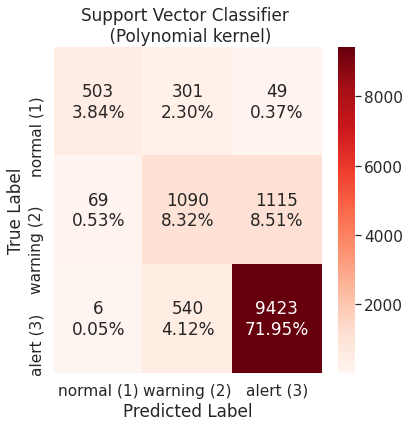

In [144]:
# Load from file
pkl_filename = "../data/pickle_model_SVC_poly_2020-10-12.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score
score = pickle_model.score(X_test_scaled, y_test)
print("Test score: {0:.2f} %".format(100 * score))

# Calculate CV score
CV_score = cross_val_score(pickle_model, X_train_scaled, y_train, cv=3)
print("Mean CV score: {0:.2f} %".format(100 * CV_score.mean()))

# Make predictions
y_pred = pickle_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cost = my_cost_function(y_test, y_pred)
print("Cost on test data: {}".format(cost))

#Plot Confusion Matrix
_ = plot_multiclass_confusion_matrix(y_test, y_pred,['normal (1)','warning (2)','alert (3)'])
_ = plt.title('Support Vector Classifier \n (Polynomial kernel)')

In [ ]:
# # Random Forest
# select_cv = hyper_tuning['grid_cv object'][1]

# test_score = select_cv.score(X_test_scaled, y_test)

# y_pred = select_cv.predict(X_test_scaled)
# cm = confusion_matrix(y_test, y_pred)
# cost = my_cost_function(y_test, y_pred)

# print(test_score)
# print(cm)
# print(cost)
# _ = plot_multiclass_confusion_matrix(y_test, y_pred,[1,2,3])
# plt.title('Random Forest')

The Support Vector Classifier has both a higher accuracy and a lower cost due to misclassification

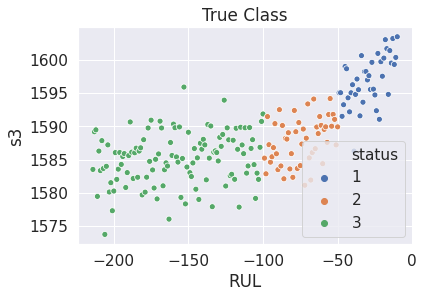

In [145]:
import random
#let's see it in action
# pick one engine trace from the test dataset
test_df = pd.read_csv('../data/test_op_regime2_FD001.csv')

# random_unit = random.choice(test_df['unit_number'].unique())
# print('Unit number : '+ str(random_unit)) 
random_unit = 76 #76 is a good example

test_df = test_df[test_df['unit_number']==random_unit]

#setting an arbitary boundary at 50 and 100 cycles for the binning\
first_boundary = -100
second_boundary = -50
test_df['status'] = pd.cut(test_df['RUL'],[-np.inf,first_boundary,second_boundary,0],labels=[3,2,1])

_ = sns.scatterplot('RUL','s3',data = test_df, hue='status')
_ = plt.title('True Class')
plt.savefig('../figures/SIMULATION_true_class.png')

In [146]:
cols_to_drop = ['dataset','unit_number', 
        'op_setting_1', 'op_setting_2', 'op_setting_3',
        's1', 's5', 's6', 's10', 's16', 's18', 's19',
        'op_regime','RUL']
predictor_col = ['status']

X_test = test_df.drop(cols_to_drop + predictor_col, axis=1).to_numpy()
X_test_scaled=scaler.transform(X_test)
y_pred = pickle_model.predict(X_test_scaled)
test_df['pred_status']=y_pred

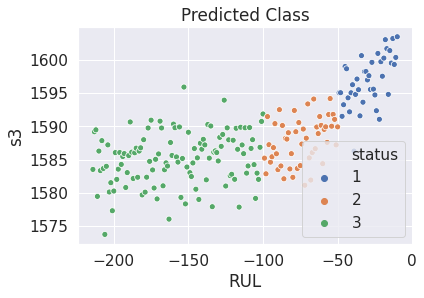

In [147]:
_ = sns.scatterplot('RUL','s3',data = test_df, hue='status')
_ = plt.title('Predicted Class')
plt.savefig('../figures/SIMULATION_predicted_class.png')

In [148]:
test_df['correct'] = test_df['pred_status'] == test_df['status']

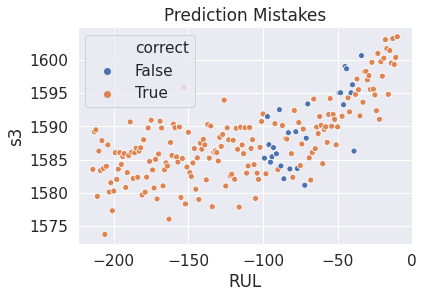

In [149]:
_ = sns.scatterplot('RUL','s3',data = test_df, hue='correct')
_ = plt.title('Prediction Mistakes')
plt.savefig('../figures/SIMULATION_classification_error.png')